In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import math
from cvxpy import *

In [2]:
#small case
case = [300, 1280, 50] #[300, 1280, 50] [30,128,14]
m=case[0]
n=case[1] 
k=case[2]
its = 150

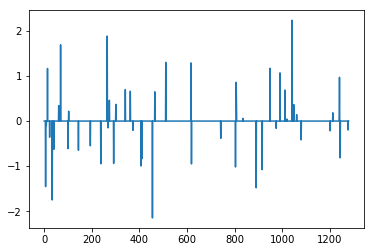

In [3]:
A,Rtmp=np.linalg.qr(np.random.standard_normal((n,m)))
A=A.T
p=np.random.permutation(n)
p=p[0:k]
x0=np.zeros((n,1))
x0[p]=np.random.standard_normal((k,1))
b=np.dot(A,x0)+0.02*np.random.standard_normal((m,1))
plt.plot(x0)
plt.show()
lambda_max=np.linalg.norm(A*b)
lambda0 = 0.1*lambda_max;

In [4]:
def prox(x,l):
    prox = np.zeros((n,1))
    for i in range(n):
        prox[i] = np.subtract(x[i],(min(l,np.abs(x[i]))*np.sign(x[i])))
    return prox

In [5]:
#proximal descent
a = 1/np.linalg.norm((np.dot(A.T,A)),2)
b0 = np.random.uniform(-10,10,(n,1))
obj0 = np.zeros(its)
j=0
while j<its:
    calc = (b0 - np.dot(a*A.T,(np.dot(A,b0)-b)))
    b0 = prox(calc,lambda0)
    obj0[j] = (0.5*(sum_squares(A*np.reshape(b0,(n)) - b))+(lambda0*norm(b0,1))).value
    j+=1


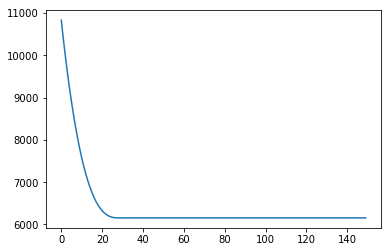

In [6]:
plt.plot(obj0)

plt.show()

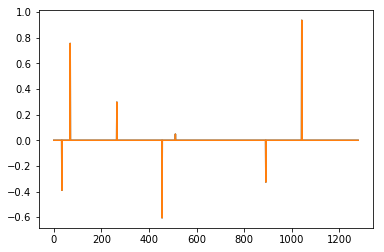

Proximal descent 3.34607639271e-07


In [7]:
# Construct the problem.
x = Variable(n)
objective = Minimize(0.5*(sum_squares(A*x - b))+(lambda0*norm(x,1)))
prob = Problem(objective)
result = prob.solve()

plt.plot(np.reshape(b0,(n,1)))
plt.plot(x.value)
plt.show()
#print "Coordinate descent", np.linalg.norm((np.reshape(b1,(n,1))-x.value),1)
print "Proximal descent", np.linalg.norm((np.reshape(b0,(n,1))-x.value),1)